In [13]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [14]:
df_spectra_raw, df_measures_raw, df_train_test_split_raw = preprocessing.get_initial_df('data')
meta_cols = ['SiteCode', 'Date', 'flag','Latitude', 'Longitude', 'DUSTf:Unc']
y_col = 'DUSTf:Value'


In [15]:
merged = preprocessing.preparation(df_spectra_raw,df_measures_raw,meta_cols,y_col)
%xdel df_spectra_raw
%xdel df_measures_raw

In [16]:
X, y, X_test, y_test = preprocessing.splitting(merged, df_train_test_split_raw, meta_cols, y_col)
%xdel merged
%xdel df_train_test_split_raw

In [17]:
best_features = preprocessing.features_selection(X, y, 20)
X = preprocessing.features_expansion(X, 4, best_features)
X_test = preprocessing.features_expansion(X_test, 4, best_features)

In [18]:
def baseline(tx_train, y_train, tx_test, y_test):
    w_opt = least_squares(y_train, tx_train)
    loss = compute_loss(y_test, tx_test, w_opt)
    return w_opt, loss


def least_squares(y, tx):
    """calculate the least squares solution."""
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

In [19]:
def compute_loss(y, tx, w, method="mse"):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    def calculate_mse(e):
        """Calculate the mse for vector e."""
        return 1/2*np.mean(e**2)
    def calculate_mae(e):
        """Calculate the mae for vector e."""
        return np.mean(np.abs(e))
    
    e = y - tx.dot(w)
    
    if method == "mse":
        return calculate_mse(e)
    if method == "mae":
        return calculate_mae

In [30]:
w, loss = baseline(X, y, X_test, y_test)

In [29]:
def y_compare(y, X, w, unc):
    y_hat = X.dot(w)
    plt.scatter(y, y_hat, s=4)
    plt.plot(np.arange(max(y)), np.arange(max(y)), color="black")
    plt.yscale('linear')
    plt.xscale('linear')
    plt.show()
y_compare(y_test, X_test, w, 1)
print(r2_score(y_test, X_test.dot(w)))

0.9923687385706581


# WHAT THE FUCK?!!?!!?!?!!?!??!!?

In [22]:
df = pd.DataFrame({
    'y': y_test,
    'y_hat': X_test.dot(w)
})

In [23]:
df['diff'] = (df.y - df.y_hat)**2
df['ratio'] = (df.y / df.y_hat)
df.sort_values('diff', ascending=False)

,y,y_hat,diff,ratio
SAGU1_06_26_2015_NM_2_0_csv,83.559074,34.240131,2.432358e+03,2.440384
SHRO1_07_11_2015_NM_0_csv,102.565669,88.015209,2.117159e+02,1.165318
BOAP1_04_12_2015_NM_0_csv,13.054076,27.036597,1.955109e+02,0.482830
NEBR1_08_19_2015_NM_0_csv,10.880726,4.730320,3.782749e+01,2.300209
JARI1_03_19_2015_NM_0_csv,9.171143,3.231850,3.527520e+01,2.837738
CACR1_07_29_2015_NM_0_csv,44.256322,50.076577,3.387537e+01,0.883773
DOUG1_03_25_2015_NM_0_csv,85.535316,80.178611,2.869429e+01,1.066810
CRES1_04_06_2015_NM_0_csv,2.761885,8.033845,2.779356e+01,0.343781
SHRO1_07_08_2015_NM2_0_csv,63.309238,68.230258,2.421644e+01,0.927876
SAWE1_04_24_2015_NM_QC_0_csv,14.112609,18.466670,1.895785e+01,0.764221


<IPython.core.display.Javascript object>


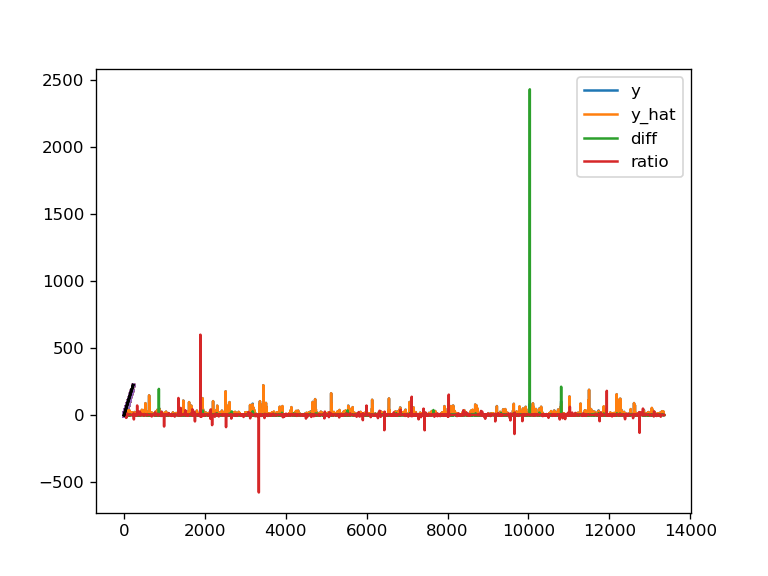

In [24]:
df.plot(logy=True)

# Cross validation

##### compute mse

##### Compute gradient

In [ ]:
def batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
    """
    Generate a minibatch iterator for a dataset.
    Takes as input two iterables (here the output desired values 'y' and the input data 'tx')
    Outputs an iterator which gives mini-batches of `batch_size` matching elements from `y` and `tx`.
    Data can be randomly shuffled to avoid ordering in the original data messing with the randomness of the minibatches.
    Example of use :
    for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
        <DO-SOMETHING>
    """
    data_size = len(y)

    if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_y = y[shuffle_indices]
        shuffled_tx = tx[shuffle_indices]
    else:
        shuffled_y = y
        shuffled_tx = tx
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        if start_index != end_index:
            yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]


In [ ]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    y_hat = tx.dot(w)
    err = y - y_hat
    grad = -tx.T.dot(err) / len(err)
    return grad

In [ ]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
#         print("Gradient Descent({bi}/{ti}): loss={l}".format(
#               bi=n_iter, ti=max_iters - 1, l=loss))
    return loss, w

In [ ]:
def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=3):
            # compute a stochastic gradient and loss
            grad = compute_gradient(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)
    
    return loss, w

In [ ]:
# w_initial=np.zeros(X.shape[1])
# for i in range(10):
#     loss, w = stochastic_gradient_descent(y.values[:,0], X.values, w_initial, 32, 50, 0.005)
#     loss2, w2 = gradient_descent(y.values[:,0], X.values, w_initial, 50, 0.005)
#     print(loss, w)
#     print(loss2, w2)
#     print("#####")

#####  ridge regression

In [ ]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    aI = 2 * tx.shape[0] * lambda_ * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

#### cross validation

In [ ]:
def cross_validation(x_tr, y_tr, x_te, y_te, lambda_):
    """return the loss of ridge regression."""
#     w = ridge_regression(y_tr, x_tr, lambda_)
    # calculate the loss for train and test data
#     loss_tr = np.sqrt(2 * compute_mse(y_tr, x_tr, w))
#     loss_te = np.sqrt(2 * compute_mse(y_te, x_te, w))
    loss_tr, w = gradient_descent(y_tr, x_tr, np.zeros(x_tr.shape[1]), 50, lambda_)
    loss_te = compute_loss(y_te, x_te, w)
    return loss_tr, loss_te, w

##### cross_validation_visualization

In [ ]:
def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")

In [ ]:
def cross_validation_demo():
#     seed = 12
    k_fold = 10
    lambdas = np.logspace(-7, -3, 30)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    
    for lambda_ in lambdas:
        print('lambda=',lambda_)
        rmse_tr_tmp = []
        rmse_te_tmp = []
        kf = KFold(n_splits=k_fold, shuffle=True)
        
        for ind_tr, ind_te in kf.split(X):
#             print(y.iloc[ind_tr].values)
            loss_tr, loss_te, w = cross_validation(X.iloc[ind_tr].values, 
                                                  y.iloc[ind_tr].values,
                                                  X.iloc[ind_te].values,
                                                  y.iloc[ind_te].values, 
                                                  lambda_,)
            print("Losses are [tr]:{:.4f}, [te]:{:.5f}".format(loss_tr, loss_te))
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))
    return lambdas, rmse_tr, rmse_te

lambdas, rmse_tr, rmse_te = cross_validation_demo()
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
cross_validation_visualization(lambdas[:15], rmse_tr[:15], rmse_te[:15])